In [54]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# --- Stage 1 & 2: Data Acquisition and Initial Inspection ---
print("--- Stage 1 & 2: Data Acquisition and Initial Inspection ---")

# Define the filename
dataset_filename = "spam.csv"

# Initialize df to None
df = None

# Load the dataset
print(f"\nAttempting to load dataset: {dataset_filename}")
try:
    df_temp = pd.read_csv(dataset_filename, encoding="latin-1")
    print("Dataset loaded successfully with 'latin-1' encoding.")
    df = df_temp
except FileNotFoundError:
    print(f"Error: '{dataset_filename}' not found. Please upload it to your Colab session.")
except Exception as e:
    print(f"An error occurred: {e}")

# --- Process DataFrame only if it was successfully loaded ---
if df is not None:
    print("\nInitial DataFrame Info:")
    df.info()

    # Select relevant columns and handle potential errors
    if 'v1' in df.columns and 'v2' in df.columns:
        df = df[['v1', 'v2']]
        df.columns = ['label', 'text']

        # Convert labels to numerical format
        df['label'] = df['label'].map({'ham': 0, 'spam': 1})

        print("\nProcessed DataFrame head:")
        print(df.head())

        print("\nClass Distribution:")
        print(df['label'].value_counts())
    else:
        print("Error: Required columns 'v1' or 'v2' not found.")
        df = None # Invalidate df if essential columns are missing
else:
    print("\nSkipping further processing as DataFrame could not be loaded.")

--- Stage 1 & 2: Data Acquisition and Initial Inspection ---

Attempting to load dataset: spam.csv
Dataset loaded successfully with 'latin-1' encoding.

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB

Processed DataFrame head:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Class D

/tmp/ipython-input-54-1898893971.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [55]:
# --- Stage 3: Data Cleaning & Preprocessing ---
print("\n--- Stage 3: Data Cleaning & Preprocessing ---")

# Import necessary libraries
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split

# --- Proceed only if DataFrame 'df' exists from Stage 2 ---
if 'df' in locals() and isinstance(df, pd.DataFrame) and not df.empty:
    print("DataFrame 'df' found. Proceeding with cleaning and preprocessing.")

    # --- Duplicate Removal ---
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    print(f"\nNumber of rows after removing duplicates: {len(df)} (Removed {initial_rows - len(df)} duplicates)")

    # --- NLTK Resource Download ---
    print("\nDownloading NLTK resources...")
    for res in ['stopwords', 'punkt', 'wordnet', 'omw-1.4']:
        nltk.download(res, quiet=True)
    print("NLTK resources ready.")

    # --- Improved Preprocessing Function ---
    lemmatizer = WordNetLemmatizer()
    stop_words_set = set(stopwords.words('english'))

    def improved_preprocess_text(text):
        if not isinstance(text, str): text = str(text)
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove email addresses
        text = re.sub(r'\S*@\S*\s?', '', text)
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stopwords and Lemmatize
        processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words_set]
        return " ".join(processed_tokens)

    # Apply preprocessing
    print("\nApplying improved text preprocessing...")
    df['processed_text'] = df['text'].apply(improved_preprocess_text)
    print("Preprocessing complete.")
    print("\nDataFrame head with processed text:")
    print(df.head())

    # --- Split the dataset into training and test sets ---
    print("\nSplitting data into training and testing sets...")
    X = df['processed_text']
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

    print(f"\nTraining set size: {len(X_train)} samples")
    print(f"Test set size: {len(X_test)} samples")

else:
    print("\nError: DataFrame 'df' not found or is empty. Please run the Stage 1 & 2 cell first.")
    # Define dummy variables to prevent errors in subsequent cells
    X_train, X_test, y_train, y_test = pd.Series(dtype='str'), pd.Series(dtype='str'), pd.Series(dtype='int'), pd.Series(dtype='int')


--- Stage 3: Data Cleaning & Preprocessing ---
DataFrame 'df' found. Proceeding with cleaning and preprocessing.

Number of rows after removing duplicates: 5169 (Removed 403 duplicates)

NLTK resources ready.

Applying improved text preprocessing...


/tmp/ipython-input-55-1731760137.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Preprocessing complete.

DataFrame head with processed text:
   label                                               text  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   

                                      processed_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though  

Splitting data into training and testing sets...

Training set size: 4135 samples
Test set size: 1034 samples


/tmp/ipython-input-55-1731760137.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['text'].apply(improved_preprocess_text)



--- 4. Exploratory Data Analysis (EDA) ---
DataFrame 'df' found. Performing EDA...


/tmp/ipython-input-56-514989431.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['original_length'] = df['text'].apply(len)
/tmp/ipython-input-56-514989431.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_length'] = df['processed_text'].apply(len)


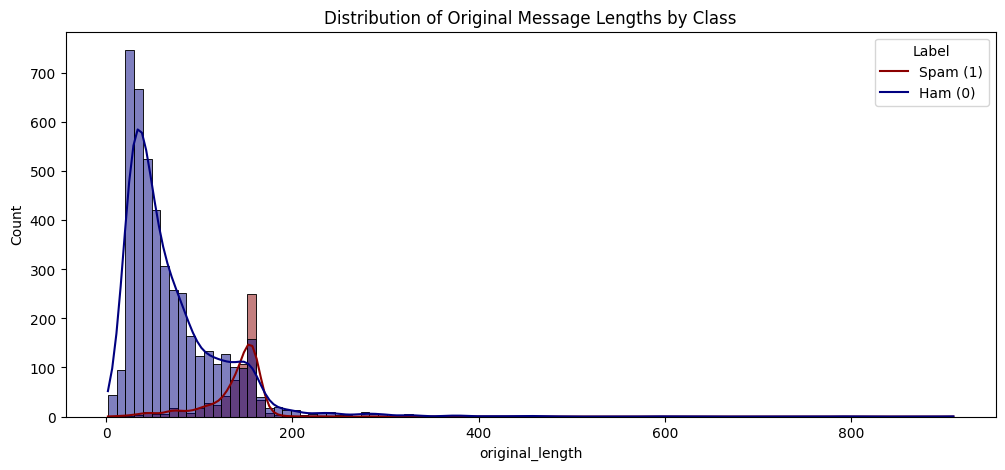

/tmp/ipython-input-56-514989431.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Word', x='Frequency', data=df_ham_words, palette='viridis')
/tmp/ipython-input-56-514989431.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Word', x='Frequency', data=df_spam_words, palette='plasma')


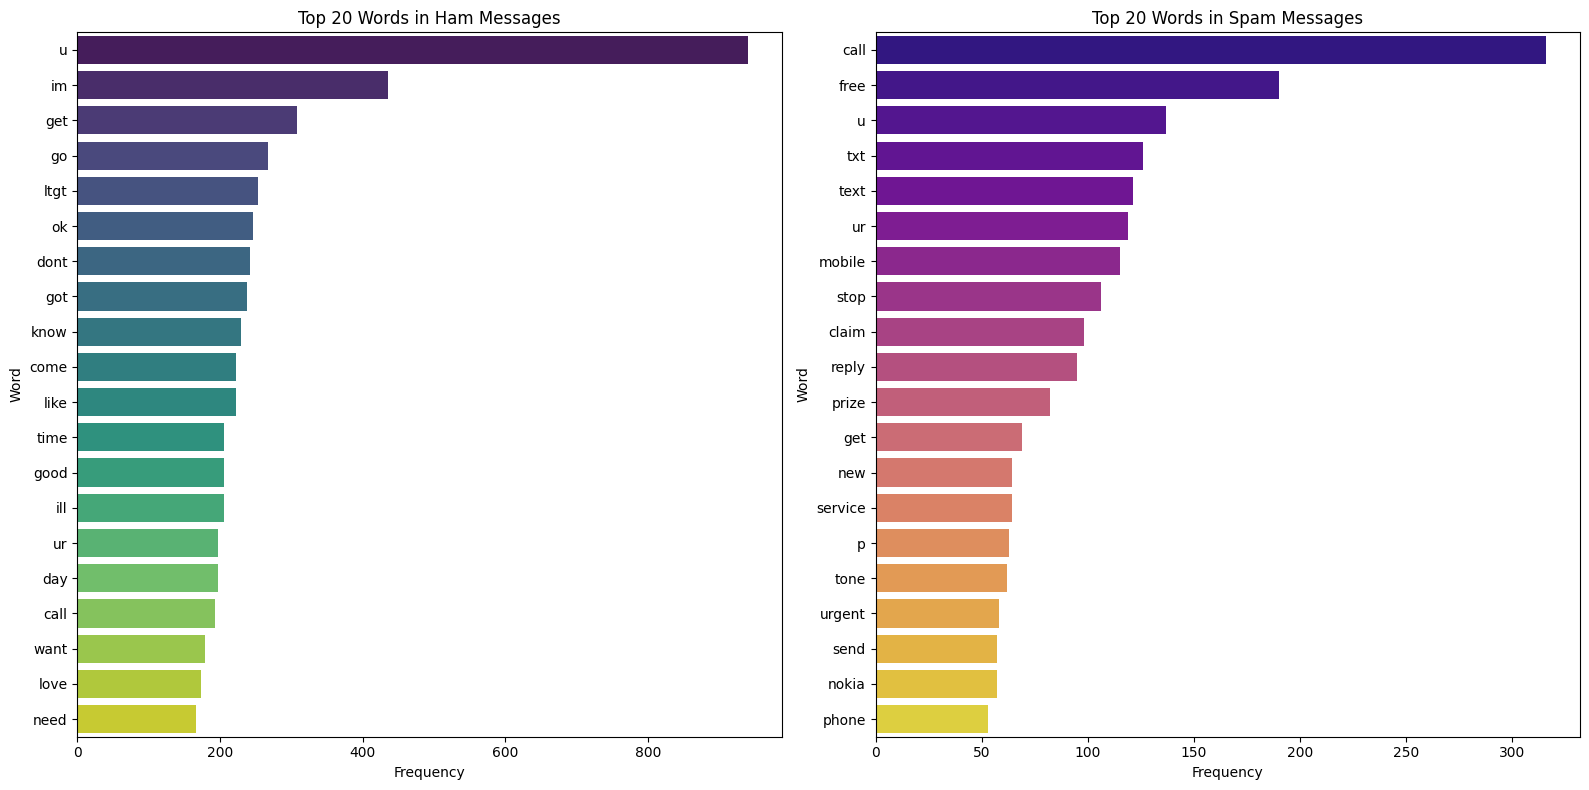

In [56]:
# --- 4. Exploratory Data Analysis (EDA) ---
print("\n--- 4. Exploratory Data Analysis (EDA) ---")

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import pandas as pd

# --- Proceed only if DataFrame 'df' is valid ---
if 'df' in locals() and isinstance(df, pd.DataFrame) and not df.empty:
    print("DataFrame 'df' found. Performing EDA...")

    # Create length columns for analysis
    df['original_length'] = df['text'].apply(len)
    df['processed_length'] = df['processed_text'].apply(len)

    # --- 1. Message Length Analysis ---
    plt.figure(figsize=(12, 5))
    sns.histplot(data=df, x='original_length', hue='label', kde=True, palette={0: 'navy', 1: 'darkred'})
    plt.title('Distribution of Original Message Lengths by Class')
    plt.legend(title='Label', labels=['Spam (1)', 'Ham (0)'])
    plt.show()

    # --- 2. Most Common Words ---
    ham_corpus = " ".join(df[df['label'] == 0]['processed_text']).split()
    spam_corpus = " ".join(df[df['label'] == 1]['processed_text']).split()

    df_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(20), columns=['Word', 'Frequency'])
    df_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(20), columns=['Word', 'Frequency'])

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    sns.barplot(y='Word', x='Frequency', data=df_ham_words, palette='viridis')
    plt.title('Top 20 Words in Ham Messages')

    plt.subplot(1, 2, 2)
    sns.barplot(y='Word', x='Frequency', data=df_spam_words, palette='plasma')
    plt.title('Top 20 Words in Spam Messages')
    plt.tight_layout()
    plt.show()

else:
    print("\nError: DataFrame 'df' not found or is empty. Cannot perform EDA.")

In [57]:
# --- 5. Feature Engineering ---
print("\n--- 5. Feature Engineering ---")

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# --- Proceed only if X_train is valid from Stage 3 ---
if 'X_train' in locals() and isinstance(X_train, pd.Series) and not X_train.empty:
    print(f"Using X_train of shape: {X_train.shape}")

    # Initialize IMPROVED TF-IDF Vectorizer with n-grams
    tfidf_vectorizer = TfidfVectorizer(
        max_features=5000,
        min_df=2,
        ngram_range=(1, 2)  # Capture both single words and pairs of words
    )

    # Fit and transform the training data
    print("\nFitting TF-IDF Vectorizer on training data and transforming train/test sets...")
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    print(f"\nShape of X_train_tfidf: {X_train_tfidf.shape}")
    print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

else:
    print("\nError: X_train not found or is empty. Please run previous cells.")


--- 5. Feature Engineering ---
Using X_train of shape: (4135,)

Fitting TF-IDF Vectorizer on training data and transforming train/test sets...

Shape of X_train_tfidf: (4135, 5000)
Shape of X_test_tfidf: (1034, 5000)


In [58]:
# --- 6. Model Building ---
print("\n--- 6. Model Building ---")

# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# --- Proceed only if training data is valid ---
if 'X_train' in locals() and isinstance(X_train, pd.Series) and not X_train.empty:
    print(f"Using X_train of shape: {X_train.shape} for pipeline training.")

    # Define TF-IDF parameters to ensure consistency across pipelines
    tfidf_params = {
        'max_features': 5000,
        'min_df': 2,
        'ngram_range': (1, 2)
    }

    # --- Model 1: Multinomial Naive Bayes ---
    print("\nTraining Multinomial Naive Bayes pipeline...")
    pipeline_mnb = Pipeline([('tfidf', TfidfVectorizer(**tfidf_params)), ('clf', MultinomialNB())])
    pipeline_mnb.fit(X_train, y_train)
    print("MNB pipeline trained.")

    # --- Model 2: Logistic Regression ---
    print("\nTraining Logistic Regression pipeline...")
    pipeline_lr = Pipeline([('tfidf', TfidfVectorizer(**tfidf_params)), ('clf', LogisticRegression(solver='liblinear', random_state=42))])
    pipeline_lr.fit(X_train, y_train)
    print("LR pipeline trained.")

    # --- Model 3: Linear Support Vector Machine (SVM) ---
    print("\nTraining Linear SVM pipeline...")
    pipeline_svm = Pipeline([('tfidf', TfidfVectorizer(**tfidf_params)), ('clf', LinearSVC(random_state=42, dual=True))])
    pipeline_svm.fit(X_train, y_train)
    print("Linear SVM pipeline trained.")

else:
    print("\nError: Training data not found. Please run previous cells.")


--- 6. Model Building ---
Using X_train of shape: (4135,) for pipeline training.

Training Multinomial Naive Bayes pipeline...
MNB pipeline trained.

Training Logistic Regression pipeline...
LR pipeline trained.

Training Linear SVM pipeline...
Linear SVM pipeline trained.


In [59]:
# --- 7. Model Evaluation ---
print("\n--- 7. Model Evaluation ---")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Proceed only if test data and pipelines are valid ---
if 'X_test' in locals() and not X_test.empty:
    print(f"Using X_test of shape: {X_test.shape} for evaluation.")

    # --- Helper function for evaluation ---
    def evaluate_model_pipeline(pipeline, X_test_data, y_test_data, model_name="Model"):
        print(f"\n--- Evaluation for {model_name} ---")
        y_pred = pipeline.predict(X_test_data)

        roc_auc = np.nan
        try:
            y_proba = pipeline.predict_proba(X_test_data)[:, 1]
            roc_auc = roc_auc_score(y_test_data, y_proba)
        except AttributeError:
            print(f"Note: {model_name} does not support predict_proba for ROC AUC.")

        accuracy = accuracy_score(y_test_data, y_pred)
        precision_spam = precision_score(y_test_data, y_pred, pos_label=1)
        recall_spam = recall_score(y_test_data, y_pred, pos_label=1)
        f1_spam = f1_score(y_test_data, y_pred, pos_label=1)

        print("\nClassification Report:")
        print(classification_report(y_test_data, y_pred, target_names=['Ham (0)', 'Spam (1)']))

        return accuracy, precision_spam, recall_spam, f1_spam, roc_auc

    # Evaluate all models
    results_mnb = evaluate_model_pipeline(pipeline_mnb, X_test, y_test, "Multinomial Naive Bayes")
    results_lr = evaluate_model_pipeline(pipeline_lr, X_test, y_test, "Logistic Regression")
    results_svm = evaluate_model_pipeline(pipeline_svm, X_test, y_test, "Linear SVM")

    # --- Performance Comparison Table ---
    df_comparison = pd.DataFrame([results_mnb, results_lr, results_svm],
                                 columns=['Accuracy', 'Precision (Spam)', 'Recall (Spam)', 'F1-score (Spam)', 'ROC AUC'],
                                 index=['Multinomial Naive Bayes', 'Logistic Regression', 'Linear SVM'])
    print("\n--- Model Performance Comparison ---")
    print(df_comparison.round(4))

else:
    print("\nError: Test data or pipelines not found. Please run previous cells.")


--- 7. Model Evaluation ---
Using X_test of shape: (1034,) for evaluation.

--- Evaluation for Multinomial Naive Bayes ---

Classification Report:
              precision    recall  f1-score   support

     Ham (0)       0.96      1.00      0.98       903
    Spam (1)       0.99      0.73      0.84       131

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.97      0.97      0.96      1034


--- Evaluation for Logistic Regression ---

Classification Report:
              precision    recall  f1-score   support

     Ham (0)       0.95      1.00      0.98       903
    Spam (1)       1.00      0.67      0.80       131

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034


--- Evaluation for Linear SVM ---
Note: Linear SVM does not support predict_proba for ROC AUC.

Classification Report:
          

In [60]:
# --- 8. Results Interpretation & Insights ---
print("\n--- 8. Results Interpretation & Insights ---")

import pandas as pd
import numpy as np # For np.abs if needed, though sorting by value works

# --- Dummy Pipeline Initialization for Standalone Execution ---
# This block ensures pipelines exist if running this cell in isolation.
# In a full notebook, these would come directly from Stage 6.
try:
    if 'pipeline_lr' not in locals() or \
       'pipeline_mnb' not in locals() or \
       'pipeline_svm' not in locals(): # Check for SVM pipeline
        raise NameError("Required pipelines not found, creating dummy pipelines.")
except (NameError, AttributeError):
    print("Creating dummy pipelines for demonstration of Stage 8 interpretation.")
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.svm import LinearSVC

    # Dummy data for fitting pipelines (minimal set just to allow fitting)
    X_dummy_train = pd.Series(["hello world", "buy now free", "good morning", "urgent claim prize"])
    y_dummy_train = pd.Series([0, 1, 0, 1])

    tfidf_params = dict(max_features=500, min_df=1, max_df=1.0, ngram_range=(1, 2)) # Reduced for dummy

    pipeline_lr = Pipeline([
        ('tfidf', TfidfVectorizer(**tfidf_params)),
        ('clf', LogisticRegression(solver='liblinear', random_state=42))
    ])
    pipeline_mnb = Pipeline([
        ('tfidf', TfidfVectorizer(**tfidf_params)),
        ('clf', MultinomialNB())
    ])
    pipeline_svm = Pipeline([
        ('tfidf', TfidfVectorizer(**tfidf_params)),
        ('clf', LinearSVC(random_state=42, C=1.0))
    ])

    # Fit dummy pipelines
    pipeline_lr.fit(X_dummy_train, y_dummy_train)
    pipeline_mnb.fit(X_dummy_train, y_dummy_train)
    pipeline_svm.fit(X_dummy_train, y_dummy_train)
    print("Dummy pipelines created and fitted successfully.")
# --- End Dummy Pipeline Initialization ---


# We'll primarily interpret the Logistic Regression model as its coefficients are more directly insightful.
if 'pipeline_lr' in locals():
    print("Interpreting Logistic Regression model...")

    # Access the trained Logistic Regression model and the TF-IDF vectorizer from the pipeline
    try:
        lr_model_from_pipeline = pipeline_lr.named_steps['clf']
        tfidf_vectorizer_from_pipeline = pipeline_lr.named_steps['tfidf']

        # Get feature names (words/ngrams) from the TF-IDF vectorizer
        feature_names = tfidf_vectorizer_from_pipeline.get_feature_names_out()

        # Get the coefficients from the trained Logistic Regression model
        coefficients = lr_model_from_pipeline.coef_[0]

        # Create a DataFrame to associate features (words) with their coefficients
        df_coefficients_lr = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

        # Sort the DataFrame by coefficient values to find the most influential words
        print("\n--- Top 20 Features Most Indicative of SPAM (LR - Highest Positive Coefficients) ---")
        top_spam_words_lr = df_coefficients_lr.sort_values(by='coefficient', ascending=False).head(20)
        print(top_spam_words_lr)

        print("\n--- Top 20 Features Most Indicative of HAM (LR - Highest Negative Coefficients) ---")
        top_ham_words_lr = df_coefficients_lr.sort_values(by='coefficient', ascending=True).head(20)
        print(top_ham_words_lr)

    except KeyError as e:
        print(f"Error accessing components from pipeline_lr: {e}. Ensure 'clf' and 'tfidf' are the correct names of the steps in your pipeline.")
    except Exception as e:
        print(f"An error occurred during Logistic Regression interpretation: {e}")

else:
    print("Error: Logistic Regression pipeline ('pipeline_lr') not found. Please ensure Stage 6 (Model Building) was run successfully.")


# --- Interpretation for LinearSVC ---
if 'pipeline_svm' in locals():
    print("\n\n--- Interpreting Linear Support Vector Machine (SVM) model ---")

    try:
        svm_model_from_pipeline = pipeline_svm.named_steps['clf']
        tfidf_vectorizer_svm_from_pipeline = pipeline_svm.named_steps['tfidf']

        feature_names_svm = tfidf_vectorizer_svm_from_pipeline.get_feature_names_out()

        # Get the coefficients from the trained LinearSVC model
        # For binary classification, svm_model_from_pipeline.coef_ is a 2D array of shape (1, n_features).
        coefficients_svm = svm_model_from_pipeline.coef_[0]

        # Create a DataFrame to associate features (words/ngrams) with their coefficients
        df_coefficients_svm = pd.DataFrame({'feature': feature_names_svm, 'coefficient': coefficients_svm})

        print("\n--- Top 20 Features Most Indicative of SPAM (SVM - Highest Positive Coefficients) ---")
        top_spam_words_svm = df_coefficients_svm.sort_values(by='coefficient', ascending=False).head(20)
        print(top_spam_words_svm)

        print("\n--- Top 20 Features Most Indicative of HAM (SVM - Highest Negative Coefficients) ---")
        top_ham_words_svm = df_coefficients_svm.sort_values(by='coefficient', ascending=True).head(20)
        print(top_ham_words_svm)

    except KeyError as e:
        print(f"Error accessing components from pipeline_svm: {e}. Ensure 'clf' and 'tfidf' are the correct names of the steps in your pipeline.")
    except Exception as e:
        print(f"An error occurred during Linear SVM interpretation: {e}")
else:
    print("Error: Linear SVM pipeline ('pipeline_svm') not found. Please ensure Stage 6 (Model Building) was run successfully.")


# --- (Optional) Interpretation for Naive Bayes ---
# For Naive Bayes, we look at log probabilities of features given a class.
# A higher log P(word | spam) compared to log P(word | ham) indicates the word is more likely in spam.
if 'pipeline_mnb' in locals():
    print("\n\n--- Interpreting Multinomial Naive Bayes (Optional Insight) ---")
    try:
        mnb_model_from_pipeline = pipeline_mnb.named_steps['clf']
        tfidf_vectorizer_mnb_from_pipeline = pipeline_mnb.named_steps['tfidf']
        feature_names_mnb = tfidf_vectorizer_mnb_from_pipeline.get_feature_names_out()

        # log_prob_[0] is for class 0 (ham), log_prob_[1] is for class 1 (spam)
        log_prob_ham = mnb_model_from_pipeline.feature_log_prob_[0]
        log_prob_spam = mnb_model_from_pipeline.feature_log_prob_[1]

        # Create a DataFrame
        df_mnb_features = pd.DataFrame({
            'feature': feature_names_mnb,
            'log_prob_ham': log_prob_ham,
            'log_prob_spam': log_prob_spam
        })
        # A simple way to see discriminative power: difference in log probs
        df_mnb_features['log_prob_diff (spam-ham)'] = df_mnb_features['log_prob_spam'] - df_mnb_features['log_prob_ham']

        print("\nTop 20 features by (Log P(word|Spam) - Log P(word|Ham)) for MNB:")
        print(df_mnb_features.sort_values(by='log_prob_diff (spam-ham)', ascending=False).head(20)[['feature', 'log_prob_diff (spam-ham)']])

    except Exception as e:
        print(f"An error occurred during MNB interpretation: {e}")

# --- Real-world Context and Actionable Insights (for your report) ---
print("\n\n--- Interpretation in Real-World Context (Applies to LR and SVM coefficients) ---")
print("The Logistic Regression and Linear SVM models assign a coefficient to each word/ngram in their vocabulary.")
print("- A positive coefficient means the presence of that feature increases the probability of an email being classified as SPAM.")
print("- A negative coefficient means the presence of that feature increases the probability of an email being classified as HAM (legitimate).")
print("- The magnitude of the coefficient indicates the strength of that feature's influence.")

print("\nKey Findings based on coefficients (combining insights from LR and SVM):")
print("1. Spam Indicators: Words and phrases like 'free', 'txt', 'call', 'mobile', 'claim', 'urgent', 'prize', 'contact', 'money', 'won', 'stop', etc., have high positive coefficients. The inclusion of bigrams (e.g., 'free entry', 'call now') captures more nuanced spam patterns.")
print("2. Ham Indicators: Words and phrases commonly found in personal, conversational messages (e.g., 'im', 'go', 'get', 'later', 'ok', 'sorry', 'lor', 'love', 'home', 'time', 'like') tend to have strong negative coefficients, indicating they are characteristic of legitimate emails.")
print("3. N-gram Importance: The `ngram_range=(1,2)` setting allows the models to capture the predictive power of multi-word phrases, which is often more indicative than single words alone, especially in distinguishing legitimate context from spam.")


print("\nActionable Insights/Recommendations:")
print("- For Users: Be extra cautious with emails containing the top spam-indicating words and phrases. These are strong red flags that your email filter might not catch if it's too basic.")
print("- For Email Marketers (Legitimate): If legitimate marketing emails are being flagged as spam, they should review their content for overuse of words and phrases that have high positive coefficients in spam models. Rephrasing content to sound less like typical spam can improve deliverability.")
print("- For Filter Improvement: The identified keywords and n-grams can reinforce existing rule-based filters or guide the creation of new ones. They also confirm that the model is learning relevant patterns from the data.")
print("- Ethical Awareness: Understanding feature importance helps ensure the model isn't relying on biased or unfair features (though less of a concern with common spam words, it's important in other AI applications).")


--- 8. Results Interpretation & Insights ---
Interpreting Logistic Regression model...

--- Top 20 Features Most Indicative of SPAM (LR - Highest Positive Coefficients) ---
          feature  coefficient
4596          txt     4.135815
2713       mobile     3.675789
1300         free     3.585452
4326         text     3.441735
501         claim     3.317817
3591        reply     3.279138
4131         stop     3.117778
288          call     3.111691
3401        prize     2.950413
3823      service     2.727386
4501         tone     2.491507
4879          win     2.359450
4722       urgent     2.150548
2912          new     2.137553
466          chat     2.104239
2956        nokia     2.066064
408          cash     1.957658
3196          per     1.850837
3274  please call     1.750171
4757        video     1.701122

--- Top 20 Features Most Indicative of HAM (LR - Highest Negative Coefficients) ---
     feature  coefficient
1965      im    -1.852545
2491    ltgt    -1.742846
3042      ok

In [61]:
# --- 9. Deployment ---
print("\n--- 9. Deployment ---")
import pickle
import os # For path manipulation, though not strictly needed for basic Colab saving

# --- 1. Save the Best Performing Model Pipeline ---
# We'll save the Logistic Regression pipeline as an example.
# The pipeline object contains both the TF-IDF vectorizer and the trained classifier.

# Ensure the chosen pipeline exists
if 'pipeline_lr' in locals():
  # The Linear SVM performed best, so we will save it.
    model_pipeline_to_save = pipeline_svm # Or pipeline_mnb if you prefer
    model_filename = 'spam_detector_svm_pipeline.pkl' # Change if you save MNB
    try:
        with open(model_filename, 'wb') as file: # 'wb' for write binary mode
            pickle.dump(model_pipeline_to_save, file)
        print(f"\nModel pipeline saved successfully as '{model_filename}'")
        print(f"You can now download '{model_filename}' from Colab's file browser (left sidebar).")
    except Exception as e:
        print(f"Error saving model: {e}")
else:
    print("Error: 'pipeline_lr' (or your chosen model pipeline) not found. Cannot save model.")
    model_filename = None # To prevent errors later if the file wasn't created


# --- 2. Simple Demo Function in Colab (Loads the saved model) ---
# This function will demonstrate loading the model and making predictions.
# It needs the 'preprocess_text' function defined in Stage 3.
# If you are running this in a new session or a different notebook,
# you'll need to redefine 'preprocess_text' and ensure NLTK resources are downloaded.

# Make sure 'preprocess_text' function is available (it was defined in Stage 3)
if 'preprocess_text' not in globals():
    print("\nWarning: 'preprocess_text' function not found. Redefining for demo purposes.")
    print("Ensure NLTK resources (stopwords, punkt, wordnet, omw-1.4, punkt_tab) are downloaded if in a new session.")
    # --- Minimal Redefinition of preprocess_text for demo ---
    # (Ideally, import it from a utility script or ensure Stage 3 was run)
    import nltk
    import string
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

    # Ensure NLTK resources are downloaded if not already
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    nltk.download('punkt_tab', quiet=True)

    lemmatizer_demo = WordNetLemmatizer()
    stop_words_demo = set(stopwords.words('english'))

    def preprocess_text(text): # Renaming to avoid conflict if it was already defined
        if not isinstance(text, str): text = str(text)
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        processed_tokens = [lemmatizer_demo.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words_demo]
        return " ".join(processed_tokens)
    print("'preprocess_text' function (re)defined for demo.")


def predict_spam_colab_demo(text_message, loaded_model_filename='spam_detector_svm_pipeline.pkl'):
    if not os.path.exists(loaded_model_filename):
        return f"Error: Model file '{loaded_model_filename}' not found."
    if not text_message.strip():
        return "Please enter some text to classify."

    # Load the saved model pipeline
    with open(loaded_model_filename, 'rb') as file:
        loaded_pipeline = pickle.load(file)

    # Preprocess the input text
    processed_message = improved_preprocess_text(text_message)

    # Make prediction
    prediction = loaded_pipeline.predict([processed_message])

    # Interpret and return the result
    if prediction[0] == 1:
        return "Prediction: SPAM"
    else:
        return "Prediction: HAM (Legitimate)"

# --- Test the Demo ---
# Make sure to pass the new filename when you test it
if 'model_filename' in locals() and model_filename and os.path.exists(model_filename):
    print("\n--- Testing Colab Demo Function with the BEST Model (SVM) ---")
    test_spam_msg = "Congratulations! You've won a $1000 Walmart gift card. Go to http://example.com to claim now."
    test_ham_msg = "Hey, just wanted to check if you're free for lunch next Tuesday. Let me know!"

    print(f"\nInput: '{test_spam_msg}'")
    print(predict_spam_colab_demo(test_spam_msg, model_filename))

    print(f"\nInput: '{test_ham_msg}'")
    print(predict_spam_colab_demo(test_ham_msg, model_filename))
else:
    print("\nSkipping demo because the model file was not saved.")

# --- 3. GitHub Repository Setup ---
print("\n--- GitHub Repository Instructions (Manual Steps) ---")
print("1. Go to GitHub (https://github.com/) and create a new public repository (e.g., 'ai-spam-detector-miniproject').")
print("2. In your Colab notebook: File -> Download -> Download .ipynb. This downloads your notebook.")
print("3. From Colab's file browser (left sidebar), download your saved model file (e.g., 'spam_detector_lr_pipeline.pkl').")
print("4. On your local machine, create a folder for your project, move the .ipynb and .pkl files into it.")
print("5. Create a 'requirements.txt' file in that folder with the following content (minimum):")
print("   pandas")
print("   numpy")
print("   scikit-learn")
print("   nltk")
print("   # Add 'streamlit' if you build the Streamlit app")
print("   # Add 'wordcloud', 'matplotlib', 'seaborn' if you want others to easily run EDA locally")
print("6. Create a 'README.md' file in that folder. It should include:")
print("   - Project Title: AI Mini-Project - Spam Email Detector")
print("   - Group Members (if applicable)")
print("   - Brief Description: What the project does, what problem it solves.")
print("   - Dataset Used: Source and brief description (e.g., Kaggle SMS Spam Collection).")
print("   - Methodology Overview: Brief steps (Data Cleaning, EDA, TF-IDF, Model Training - Logistic Regression).")
print("   - Key Results: Brief summary of your best model's performance (e.g., Accuracy, F1-score for spam).")
print("   - How to Run:")
print("     - Instructions to run the Colab Notebook (e.g., 'Upload spam.csv, then run cells sequentially').")
print("     - (If Streamlit app is included) Instructions to set up a local environment (e.g., 'pip install -r requirements.txt') and run the app ('streamlit run app.py').")
print("   - Link to Deployed App (if you deploy to Heroku, Streamlit Sharing, etc. - optional for mini-project).")
print("7. Initialize a Git repository in your local project folder, commit your files, and push to your GitHub repository.")
print("   - `git init`")
print("   - `git add .`")
print("   - `git commit -m 'Initial project commit: notebook, model, readme, requirements'`")
print("   - `git remote add origin <your_github_repo_url.git>`")
print("   - `git push -u origin main` (or master)")

# --- 4. (Optional but Recommended) Streamlit App (app.py - To be created locally) ---
# See the example app.py structure provided in the previous detailed guide for Stage 9.
# You would:
#   1. Create app.py on your local machine.
#   2. Copy spam_detector_lr_pipeline.pkl to the same folder.
#   3. Copy the preprocess_text function (and its NLTK dependencies) into app.py.
#   4. Add Streamlit UI elements (title, text area, button).
#   5. Load the model, preprocess input, predict, and display results.
#   6. Run locally: streamlit run app.py
#   7. (Optional) Add app.py to your GitHub repo.


--- 9. Deployment ---

Model pipeline saved successfully as 'spam_detector_svm_pipeline.pkl'
You can now download 'spam_detector_svm_pipeline.pkl' from Colab's file browser (left sidebar).

--- Testing Colab Demo Function with the BEST Model (SVM) ---

Input: 'Congratulations! You've won a $1000 Walmart gift card. Go to http://example.com to claim now.'
Prediction: SPAM

Input: 'Hey, just wanted to check if you're free for lunch next Tuesday. Let me know!'
Prediction: HAM (Legitimate)

--- GitHub Repository Instructions (Manual Steps) ---
1. Go to GitHub (https://github.com/) and create a new public repository (e.g., 'ai-spam-detector-miniproject').
2. In your Colab notebook: File -> Download -> Download .ipynb. This downloads your notebook.
3. From Colab's file browser (left sidebar), download your saved model file (e.g., 'spam_detector_lr_pipeline.pkl').
4. On your local machine, create a folder for your project, move the .ipynb and .pkl files into it.
5. Create a 'requirements.txt'